In [51]:
#import dependecies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [52]:
# import dataset
media = pd.read_csv(r'D:\My ML projects\mlr-show-views-prediction\mediacompany.csv')
media = media.drop('Unnamed: 7',axis = 1)

In [53]:
# converting date to pandas datetime format
media['Date'] = pd.to_datetime(media['Date'])

In [54]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [55]:
# Ensure the column is truely in datetime format
media['Date'] = pd.to_datetime(media['Date'])

# Reference date
d0 = pd.to_datetime('2017-02-28')

#Now subtract and get number of days
media['day'] = (media['Date'] - d0).dt.days



In [56]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


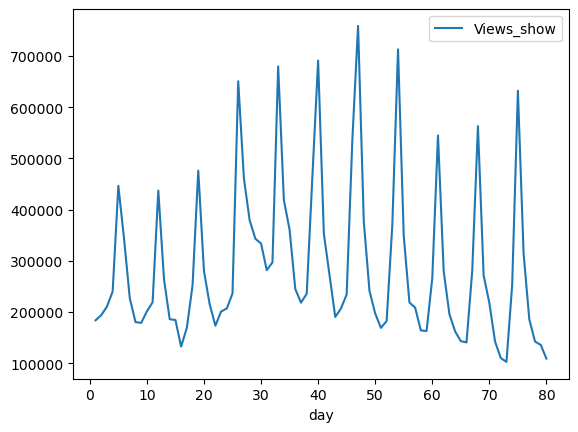

In [57]:
# days vs view_show
media.plot.line(x = 'day', y = 'Views_show')
plt.show()

C:\Users\niman\AppData\Local\Temp\ipykernel_27532\1253404561.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(media.day, media.Views_show, s=area, c=colors, alpha=0.5)


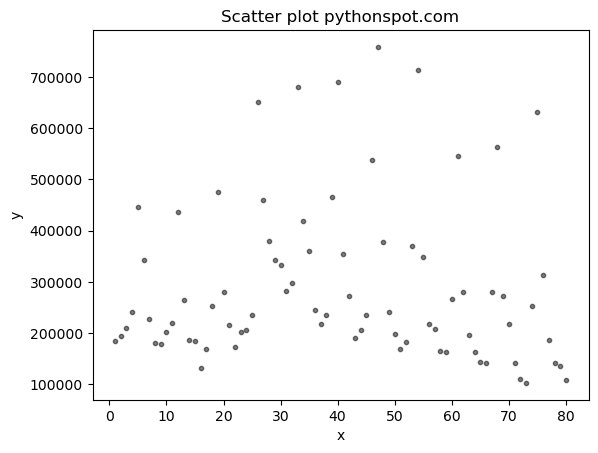

In [58]:
# scatter plot (days vs views_show)
colors = (0,0,0)
area = np.pi*3
plt.scatter(media.day, media.Views_show, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

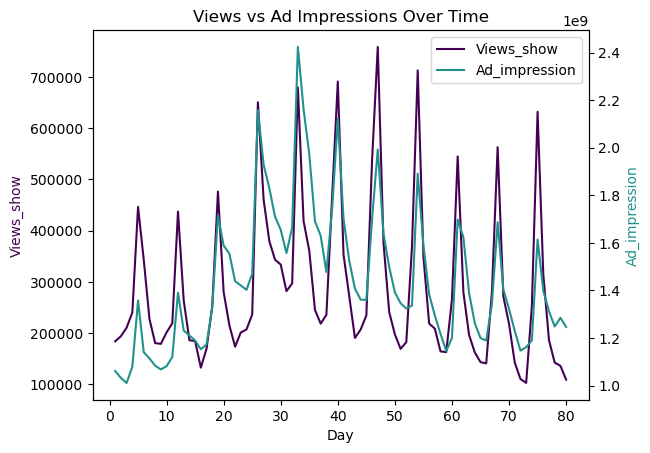

In [59]:


# Plot for days vs Views_show and days vs Ad_impressions
fig = plt.figure()
host = fig.add_subplot(111)

# Create secondary Y-axis
par1 = host.twinx()

# Labels
host.set_xlabel("Day")
host.set_ylabel("Views_show")
par1.set_ylabel("Ad_impression")

# Colors
color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)

# Plotting
p1, = host.plot(media.day, media.Views_show, color=color1, label="Views_show")
p2, = par1.plot(media.day, media.Ad_impression, color=color2, label="Ad_impression")

# Combine legends
lns = [p1, p2]
host.legend(handles=lns, loc='best')

# Set axis label colors
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.title("Views vs Ad Impressions Over Time")
plt.show()


In [60]:
# Derived Metrics
#Weekdays are taken such that 1 for sunday and 7 for saturday

media['weekday'] = (media['day']+3)%7
media.weekday.replace(0,7,inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

C:\Users\niman\AppData\Local\Temp\ipykernel_27532\4260830167.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  media.weekday.replace(0,7,inplace=True)


,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


# Running 1st model

In [61]:
# putting feature variable to X
X = media[['Visitors', 'weekday']]

# putting response variable to y
y = media['Views_show']

In [62]:
# Representing LinearRegression as 
lm = LinearRegression()

In [63]:
# fit the model to the training data
lm.fit(X,y)

LinearRegression()

In [64]:
X = sm.add_constant(X)              # Add intercept column
lm_1 = sm.OLS(y, X).fit()           # OLS model
print(lm_1.summary())               # Detailed summary


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           8.01e-12
Time:                        10:04:45   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [ ]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays
media['weekend'] = media['day'].apply(lambda i: 1 if i % 7 in [4, 5] else 0)

In [70]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


# Second model

In [71]:
# Putting feature variable to X
X = media[['Visitors','weekend']]

# Putting response variable to y
y = media['Views_show']

In [72]:

X = sm.add_constant(X)              # Add intercept column
lm_1 = sm.OLS(y, X).fit()           # OLS model
print(lm_1.summary())               # Detailed summary


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           2.51e-12
Time:                        10:08:31   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

# Third model

In [73]:
# putting feature variable to X
X = media[['Visitors', 'weekend', 'Character_A']]

# putting response variable to y
y = media['Views_show']

In [74]:

X = sm.add_constant(X)              # Add intercept column
lm_1 = sm.OLS(y, X).fit()           # OLS model
print(lm_1.summary())               # Detailed summary


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           1.53e-14
Time:                        10:14:31   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [ ]:
# create lag variable
media['Lag_views'] = np.roll(media['Views_show'], 1)
media.Lag_Views.replace(108961,0, inplace=True)